In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [29]:
# Load dataset:
df = pd.read_csv("C:\DataAnalytics\Projects\EdaProject1\ischemic stroke.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5147 entries, 0 to 5146
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient Id                    5147 non-null   int64 
 1   Age                           5147 non-null   int64 
 2   Gender                        5147 non-null   object
 3   Comorbidities                 5147 non-null   bool  
 4   Emergency Dept Time           5147 non-null   object
 5   Admission Time                5147 non-null   object
 6   Discharge Time                5147 non-null   object
 7   CT Scan Time                  5147 non-null   object
 8   TPA Time                      569 non-null    object
 9   ICU Arrival Time              2311 non-null   object
 10  ICU Checkout Time             2311 non-null   object
 11  Neurology Ward Arrival Time   5147 non-null   object
 12  Occupational Therapist Visit  4031 non-null   object
 13  Speech Pathologist

In [31]:
# cleaning column names and value:
df.columns = df.columns.str.strip().str.replace(r'[^\w\s]', '', regex=True).str.replace(' ', '_').str.lower()
print(df.columns)


Index(['patient_id', 'age', 'gender', 'comorbidities', 'emergency_dept_time',
       'admission_time', 'discharge_time', 'ct_scan_time', 'tpa_time',
       'icu_arrival_time', 'icu_checkout_time', 'neurology_ward_arrival_time',
       'occupational_therapist_visit', 'speech_pathologist_visit',
       'physiotherapist_visit', 'dietitian_visit', 'social_worker_visit',
       'cardiologist_visit', 'neurologist_visit'],
      dtype='object')


In [32]:
df

,patient_id,age,gender,comorbidities,emergency_dept_time,admission_time,discharge_time,ct_scan_time,tpa_time,icu_arrival_time,icu_checkout_time,neurology_ward_arrival_time,occupational_therapist_visit,speech_pathologist_visit,physiotherapist_visit,dietitian_visit,social_worker_visit,cardiologist_visit,neurologist_visit
0,0,67,F,True,2022-06-15 19:27:00,2022-06-16 03:57:00,2022-07-04 07:07:00,2022-06-15 19:45:00,NaN,NaN,NaN,2022-06-16 05:01:00,2022-06-18 23:28:00,2022-07-04 06:26:00,2022-06-29 06:35:00,NaN,NaN,NaN,2022-06-20 06:47:00
1,1,75,F,False,2023-01-04 23:20:00,2023-01-05 02:13:00,2023-01-10 10:59:00,2023-01-04 23:33:00,NaN,2023-01-05 02:14:00,2023-01-06 09:44:00,2023-01-06 09:44:00,NaN,2023-01-07 01:21:00,2023-01-05 03:13:00,NaN,2023-01-06 00:39:00,NaN,2023-01-06 06:17:00
2,2,50,M,False,2022-12-28 18:33:00,2022-12-29 03:20:00,2023-01-06 08:01:00,2022-12-28 18:47:00,NaN,2023-01-01 08:51:00,2023-01-02 22:15:00,2023-01-02 22:15:00,NaN,NaN,NaN,2023-01-06 07:42:00,2023-01-01 04:57:00,NaN,2022-12-29 22:37:00
3,3,63,M,False,2023-05-28 11:08:00,2023-05-28 13:35:00,2023-06-26 06:38:00,2023-05-28 11:21:00,NaN,NaN,NaN,2023-06-24 18:28:00,2023-05-29 05:56:00,2023-06-07 13:40:00,2023-06-01 08:31:00,2023-06-07 23:12:00,2023-05-30 11:21:00,NaN,2023-05-29 11:59:00
4,4,64,M,False,2022-01-21 19:48:00,2022-01-22 05:16:00,2022-02-01 20:01:00,2022-01-21 20:01:00,NaN,NaN,NaN,2022-01-22 06:43:00,2022-02-01 19:30:00,NaN,NaN,NaN,2022-01-22 06:57:00,NaN,2022-01-26 21:26:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,5142,63,F,True,2022-05-28 16:56:00,2022-05-28 22:01:00,2022-06-10 05:52:00,2022-05-28 17:08:00,NaN,2022-05-28 22:29:00,2022-05-30 01:02:00,2022-05-30 01:02:00,2022-05-29 00:24:00,2022-05-29 04:57:00,NaN,2022-05-30 22:36:00,2022-06-03 22:25:00,2022-06-10 05:20:00,2022-06-04 15:42:00
5143,5143,75,F,True,2023-10-22 21:36:00,2023-10-23 03:07:00,2023-10-31 19:25:00,2023-10-22 21:58:00,NaN,NaN,NaN,2023-10-23 06:14:00,2023-10-24 23:38:00,2023-10-23 06:27:00,2023-10-26 18:11:00,2023-10-31 19:10:00,2023-10-26 00:18:00,NaN,2023-10-27 16:14:00
5144,5144,87,M,True,2023-12-11 00:52:00,2023-12-11 04:36:00,2023-12-18 19:59:00,2023-12-11 01:04:00,NaN,2023-12-11 04:39:00,2023-12-13 18:35:00,2023-12-13 18:35:00,2023-12-11 05:25:00,NaN,2023-12-11 03:54:00,NaN,NaN,NaN,2023-12-12 03:03:00
5145,5145,69,F,False,2022-03-12 00:01:00,2022-03-12 07:49:00,2022-03-20 09:46:00,2022-03-12 00:14:00,NaN,2022-03-12 09:09:00,2022-03-13 18:34:00,2022-03-13 18:34:00,NaN,2022-03-12 09:53:00,2022-03-13 02:55:00,NaN,2022-03-13 07:40:00,NaN,2022-03-12 15:19:00


In [5]:
# clean the text values in columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [6]:
# Handle the missing values:
df.fillna(0, inplace=True)






In [7]:
#remove Duplicates:
df.drop_duplicates(inplace=True)


In [8]:
# convert the data types:
df = df.astype(int, errors='ignore')


In [9]:
df.to_csv('cleaned_ischemic_stroke.csv',index=False)

In [10]:
# 1. What is the average age of patients grouped by gender?:
df.groupby('gender')['age'].mean()


gender
F    68.742872
M    68.517122
Name: age, dtype: float64

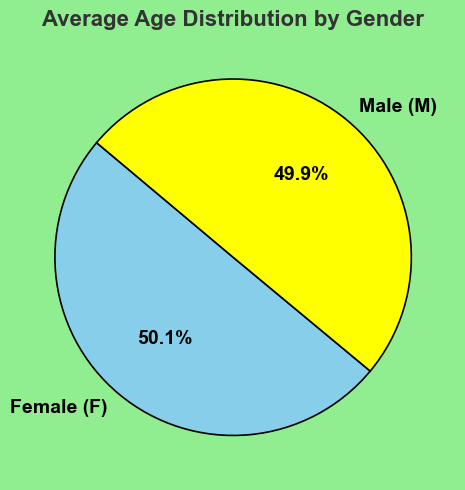

In [9]:
# Graph:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5), facecolor='lightgreen') 
labels = ['Female (F)', 'Male (M)']
sizes = [68.742872, 68.517122]  
colors = ['skyblue', 'yellow'] 
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}, 
    textprops={'fontsize': 14, 'color': 'black', 'fontweight': 'bold'}
)
plt.title('Average Age Distribution by Gender', fontsize=16, fontweight='bold', color='#333')
plt.tight_layout()
plt.show()










In [11]:
#2.What is the total number of patients in each gender category?:
df.groupby('gender')['patient_id'].count()



gender
F    1964
M    3183
Name: patient_id, dtype: int64

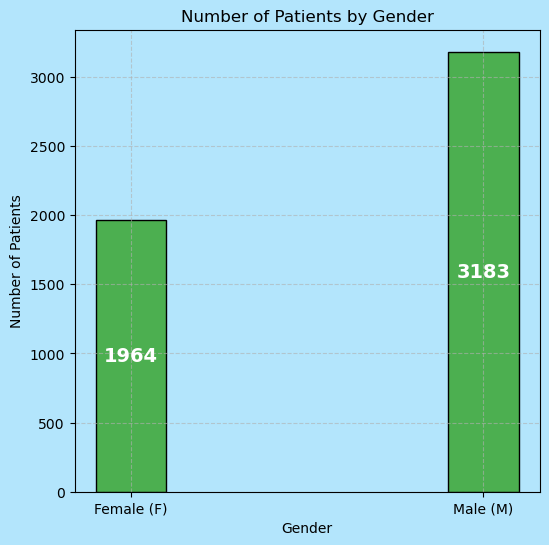

In [18]:
# Graph:

genders = ['Female (F)', 'Male (M)']
patients = [1964, 3183]
fig, ax = plt.subplots(figsize=(6,6), facecolor='#B3E5FC')
ax.set_facecolor('#B3E5FC')
bars = ax.bar(genders, patients, color='#4CAF50', edgecolor='black', width=0.2)
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, bar.get_height(), 
            ha='center', va='center', fontsize=14, fontweight='bold', color='white')
ax.set(title="Number of Patients by Gender", xlabel="Gender", ylabel="Number of Patients")
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()






In [12]:
#3. what are the total number of patients who received Tpa treatment grouped by gender?:
df["tpa given"] = df["tpa_time"].notna()
df.groupby("gender")["tpa given"].sum()


gender
F    1964
M    3183
Name: tpa given, dtype: int64

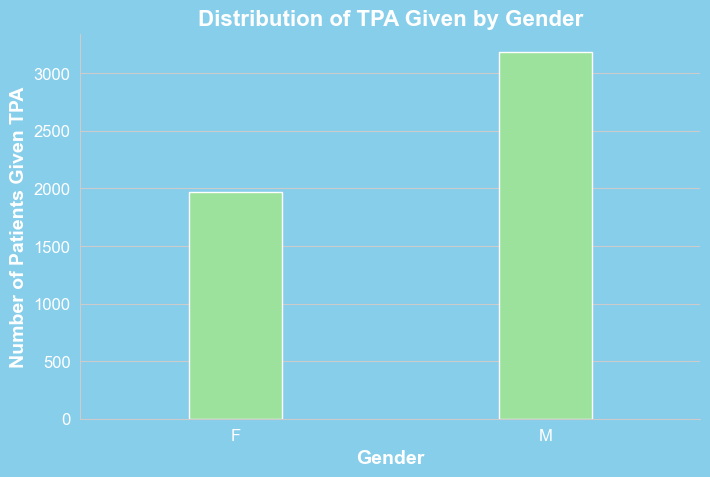

In [ ]:
# Graph:

data = pd.DataFrame({"Gender": ["F", "M"], "TPA Given": [1964, 3183]})
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor("skyblue")
ax.set_facecolor("skyblue") 
sns.barplot(data=data, x="Gender", y="TPA Given", color="lightgreen", width=0.3)
ax.set_xlabel("Gender", fontsize=14, color="white", fontweight="bold")
ax.set_ylabel("Number of Patients Given TPA", fontsize=14, color="white", fontweight="bold")
ax.set_title("Distribution of TPA Given by Gender", fontsize=16, color="white", fontweight="bold")
ax.tick_params(axis="x", colors="white", labelsize=12)
ax.tick_params(axis="y", colors="white", labelsize=12)
sns.despine()
plt.show()





In [13]:
#4.HOW much number of patients are admitted to icu,by based on the gender?:
df["icu admitted"] = df["icu_arrival_time"].notna()
df.groupby("gender")["icu admitted"].sum()


gender
F    1964
M    3183
Name: icu admitted, dtype: int64

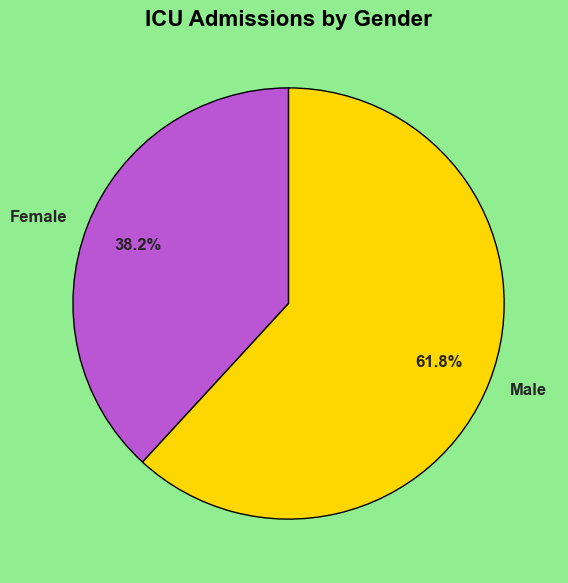

In [ ]:
 # GRAPH:

labels = ["Female", "Male"]
sizes = [1964, 3183]
colors = ["mediumorchid", "gold"]
fig, ax = plt.subplots(figsize=(7, 7), facecolor="lightgreen")
ax.set_facecolor("violet")
ax.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90,
       wedgeprops={"edgecolor": "black"}, pctdistance=0.75, textprops={"fontsize": 12, "fontweight": "bold"})
plt.title("ICU Admissions by Gender", fontsize=16, fontweight="bold", color="black")
plt.show()









In [14]:
# 5. How much number of patients who visited an occuptional therapist, grouped by gender?:
df["occupational_therapist_visit"] = df["occupational_therapist_visit"].notna()
df.groupby("gender")["occupational_therapist_visit"].sum()


gender
F    1964
M    3183
Name: occupational_therapist_visit, dtype: int64

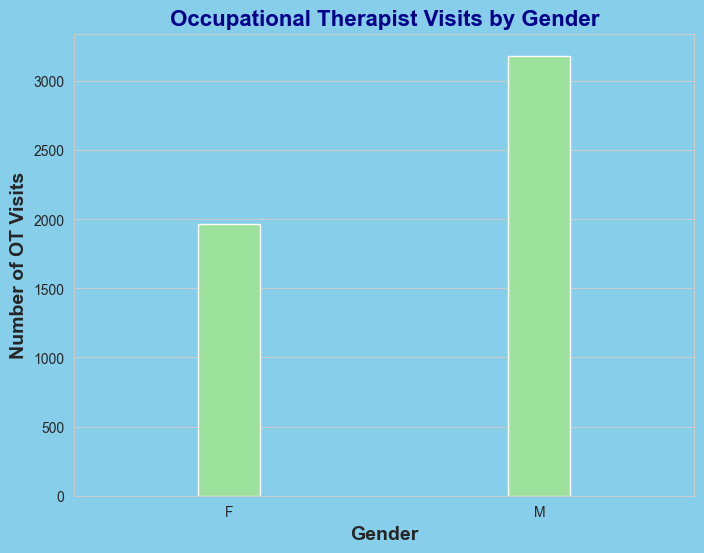

In [ ]:
# GRAPH:

data = pd.DataFrame({"Gender": ["F", "M"], "OT Visits": [1964, 3183]})
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6), facecolor="skyblue")  
ax.set_facecolor("skyblue") 
sns.barplot(data=data, x="Gender", y="OT Visits", hue="Gender", palette=["lightgreen", "lightgreen"], width=0.2, legend=False)
plt.xlabel("Gender", fontsize=14, fontweight="bold")
plt.ylabel("Number of OT Visits", fontsize=14, fontweight="bold")
plt.title("Occupational Therapist Visits by Gender", fontsize=16, fontweight="bold", color="darkblue")
plt.show()








In [15]:
# 6.HOW  many number of patients who recieved a cardiologist visit, grouped by comorbidities?:
df["cardiologist_visit"] = df["cardiologist_visit"].notna()
df.groupby("comorbidities")["cardiologist_visit"].sum()


comorbidities
0    2111
1    3036
Name: cardiologist_visit, dtype: int64

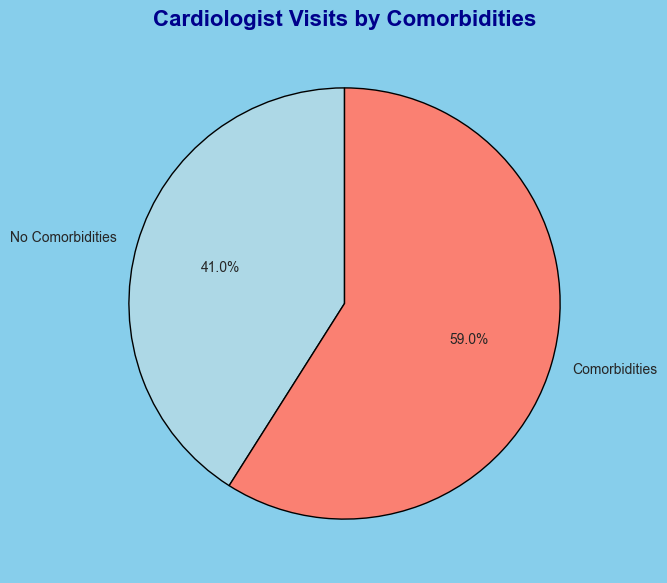

In [ ]:
# Graph:

data = pd.Series([2111, 3036], index=["No Comorbidities", "Comorbidities"])
plt.figure(figsize=(7, 7), facecolor="skyblue") 
plt.pie(data, labels=data.index, autopct="%1.1f%%", colors=["lightblue", "salmon"], startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Cardiologist Visits by Comorbidities", fontsize=16, fontweight="bold", color="darkblue")
plt.show()







In [16]:
#7. Does age have a correlation with dicharge time?:
# Convert 'discharge_time' to numeric (if needed)
df["discharge_time"] = pd.to_numeric(df["discharge_time"], errors="coerce")

correlation = df["age"].corr(df["discharge_time"])
print(f"Correlation between Age and Discharge Time: {correlation:.2f}")


Correlation between Age and Discharge Time: nan


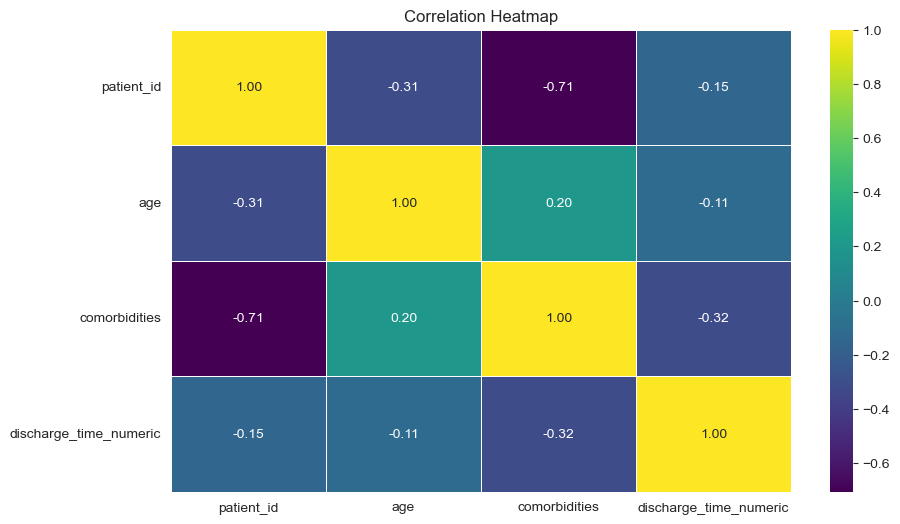

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns before computing correlation
df_numeric = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [17]:
#8.  Showing a relationship between neurology ward arrival time and discharge time ? 
df["neurology_ward_arrival_time"] = pd.to_datetime(df["neurology_ward_arrival_time"])
df["discharge_time"] = pd.to_datetime(df["discharge_time"])

print(df.groupby(df["neurology_ward_arrival_time"].dt.date)["discharge_time"].mean())


neurology_ward_arrival_time
2022-01-04   NaT
2022-01-06   NaT
2022-01-07   NaT
2022-01-09   NaT
2022-01-10   NaT
              ..
2024-01-12   NaT
2024-01-13   NaT
2024-01-16   NaT
2024-01-17   NaT
2024-02-09   NaT
Name: discharge_time, Length: 730, dtype: datetime64[ns]


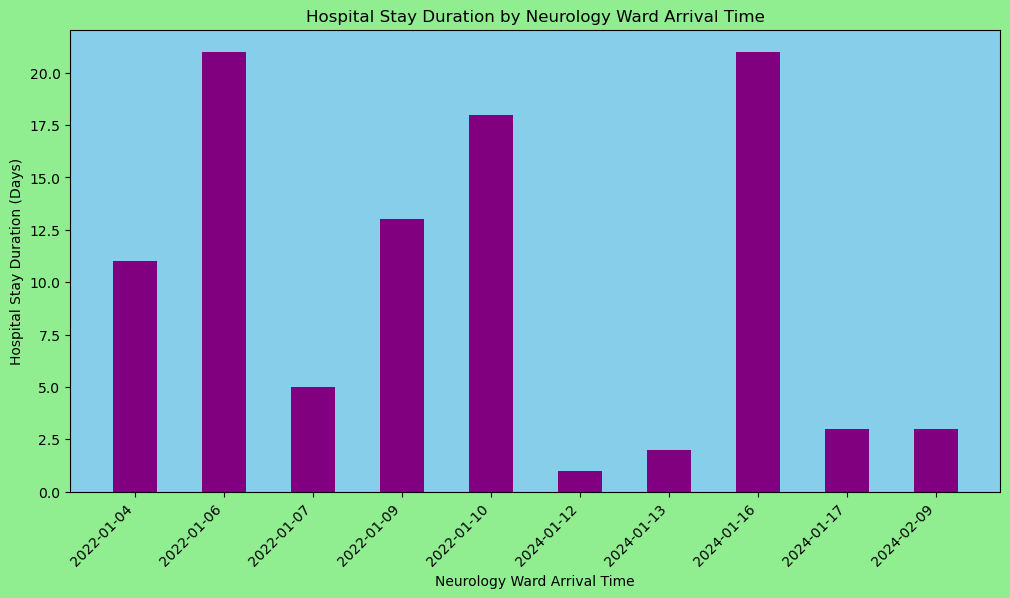

In [27]:
# Graph:

data = {
    "neurology_ward_arrival_time": pd.to_datetime([
        "2022-01-04", "2022-01-06", "2022-01-07", "2022-01-09", "2022-01-10",
        "2024-01-12", "2024-01-13", "2024-01-16", "2024-01-17", "2024-02-09"
    ]),
    "discharge_time": pd.to_datetime([
        "2022-01-15 06:37:00", "2022-01-27 15:24:00", "2022-01-12 14:09:00",
        "2022-01-22 19:26:30", "2022-01-28 00:11:00", "2024-01-13 09:26:00",
        "2024-01-15 01:42:00", "2024-02-06 12:02:00", "2024-01-20 04:23:00",
        "2024-02-12 21:37:00"
    ])
}
df = pd.DataFrame(data)
df["stay_duration"] = (df["discharge_time"] - df["neurology_ward_arrival_time"]).dt.days
fig, ax = plt.subplots(figsize=(12, 6), facecolor='lightgreen')
ax.set_facecolor('skyblue')
ax.bar(df["neurology_ward_arrival_time"].dt.strftime('%Y-%m-%d'), df["stay_duration"], color='purple', width=0.5)

ax.set(title="Hospital Stay Duration by Neurology Ward Arrival Time",xlabel="Neurology Ward Arrival Time", ylabel="Hospital Stay Duration (Days)")
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

       




In [18]:
# 9. What is the most common duration of ICU stay?:

df["ICU_Stay_Duration"] = pd.to_datetime(df["icu_checkout_time"]) - pd.to_datetime(df["icu_arrival_time"])
df.groupby("ICU_Stay_Duration").size().idxmax()


Timedelta('0 days 00:00:00')

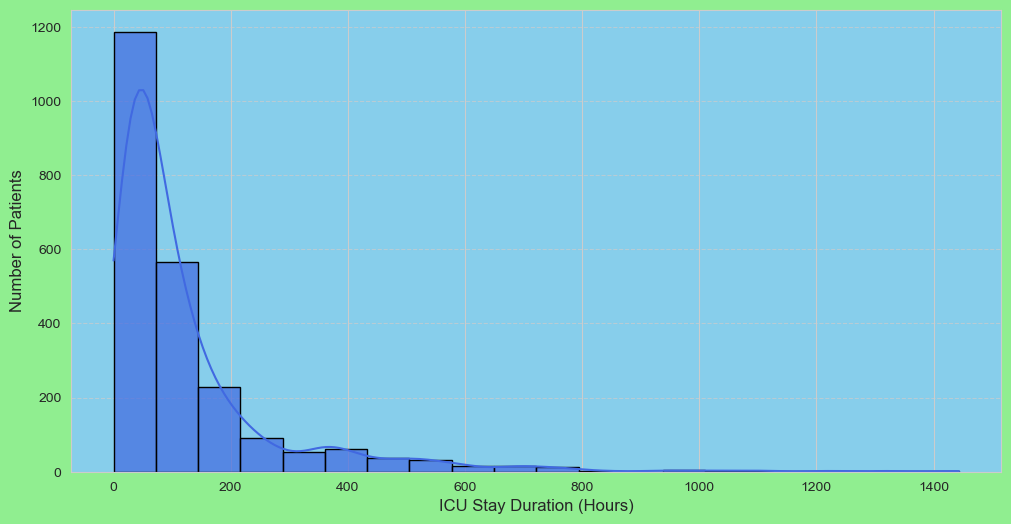

In [34]:
# Graph:

df["ICU_Stay_Hours"] = (pd.to_datetime(df["icu_checkout_time"]) - pd.to_datetime(df["icu_arrival_time"])).dt.total_seconds() / 3600
plt.figure(figsize=(12, 6), facecolor='lightgreen') 
sns.histplot(df["ICU_Stay_Hours"].dropna(), bins=20, kde=True, color="royalblue", edgecolor="black", alpha=0.7)
plt.xlabel("ICU Stay Duration (Hours)", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.gca().set_facecolor("skyblue")  
plt.show()






In [19]:
# 10. What is the proportion of patients who received a visit from a speech pathologist?:

df.groupby("patient_id")["speech_pathologist_visit"].count().gt(0).mean()


1.0

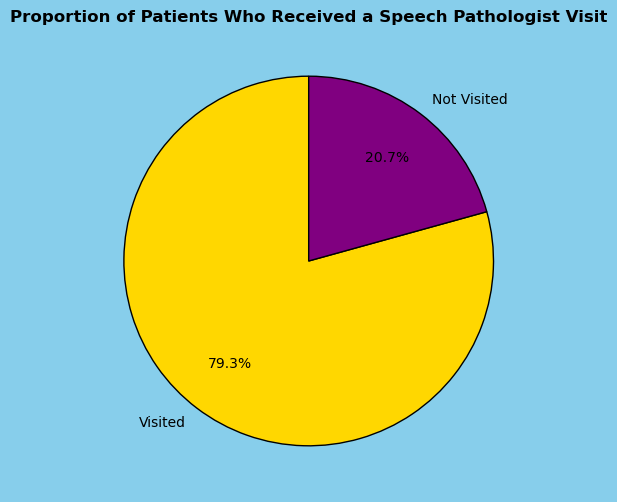

In [32]:
# Graph:

sizes = [79.3, 20.7]  
labels = ["Visited", "Not Visited"]
colors = ["gold", "purple"]
plt.figure(figsize=(6, 6), facecolor="skyblue")
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%", 
    pctdistance=0.7, 
    labeldistance=1.1, 
    startangle=90,
    wedgeprops={"edgecolor": "black"}
)
plt.title("Proportion of Patients Who Received a Speech Pathologist Visit", fontsize=12, fontweight="bold")
plt.show()








In [20]:
#11. What is the percentage of patients who were admitted to the ICU?:

df.groupby("patient_id")["icu_arrival_time"].count().gt(0).mean() * 100


100.0

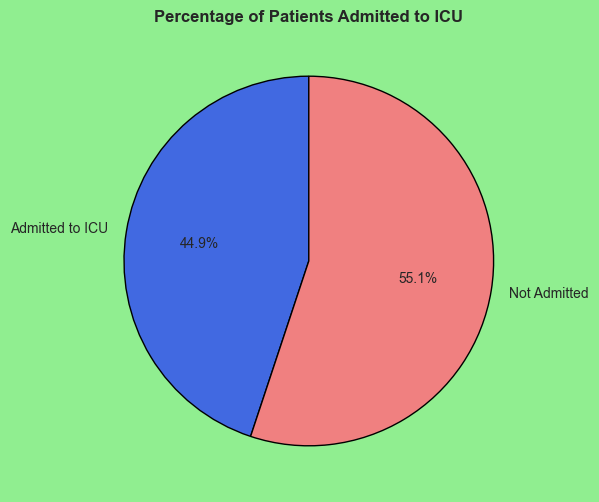

In [ ]:
# Graph:

plt.figure(figsize=(6, 6), facecolor="lightgreen")
plt.pie([44.9, 55.1], labels=["Admitted to ICU", "Not Admitted"], colors=["royalblue", "lightcoral"], 
        autopct="%1.1f%%", startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Percentage of Patients Admitted to ICU", fontsize=12, fontweight="bold")
plt.show()




In [21]:
# 12.What is the average time spent in the emergency department before admission?:

(pd.to_datetime(df["admission_time"]) - pd.to_datetime(df["emergency_dept_time"])).dt.total_seconds().mean() / 3600


6.623473220646332

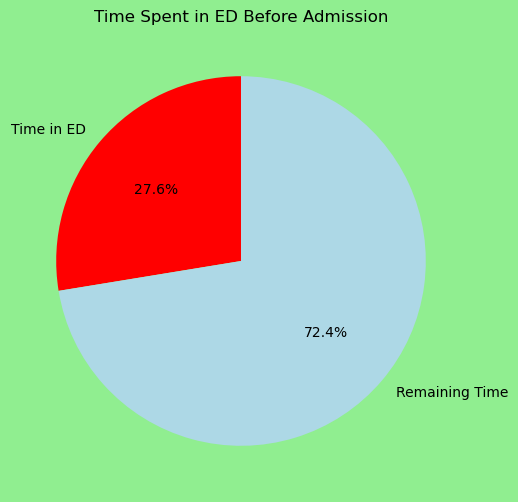

In [49]:
# Graph:
ed_time = 6.62 
remaining_time = 24 - ed_time 
labels = ["Time in ED", "Remaining Time"]
values = [ed_time, remaining_time]
plt.figure(figsize=(6, 6),facecolor='lightgreen')
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=["red", "lightblue"])
plt.title("Time Spent in ED Before Admission")
plt.show()



In [22]:
# 13.Do patients admitted to the ICU have a longer hospital stay than non-ICU patients?:

datetime_cols = ["admission_time", "discharge_time", "icu_arrival_time"]
df[datetime_cols] = df[datetime_cols].apply(pd.to_datetime, errors='coerce')
df["length_of_stay"] = (df["discharge_time"] - df["admission_time"]).dt.total_seconds() / (24 * 3600)
icu_stay_comparison = df.groupby(df["icu_arrival_time"].notna())["length_of_stay"].mean()
print(icu_stay_comparison)


icu_arrival_time
True   NaN
Name: length_of_stay, dtype: float64


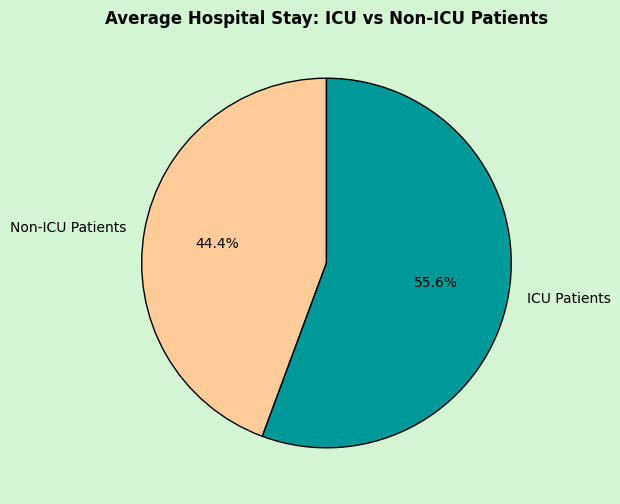

In [ ]:
# Graph:

labels = ["Non-ICU Patients", "ICU Patients"]
values = [14.004986, 17.566217] 
plt.figure(figsize=(6, 6), facecolor="#d4f5d4")
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=["#ffcc99", "#009999"], 
        startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Average Hospital Stay: ICU vs Non-ICU Patients", fontsize=12, fontweight='bold', color='black')
plt.show()




In [23]:
# 14. The people has been visited which specialist the most days?:

specialist_columns = ["occupational_therapist_visit", "speech_pathologist_visit", "physiotherapist_visit", 
                     "dietitian_visit",	"social_worker_visit", "cardiologist_visit", "neurologist_visit"]

specialist_counts = df[specialist_columns].notna().sum()
print(specialist_counts.sort_values(ascending=False))


occupational_therapist_visit    5147
speech_pathologist_visit        5147
physiotherapist_visit           5147
dietitian_visit                 5147
social_worker_visit             5147
cardiologist_visit              5147
neurologist_visit               5147
dtype: int64


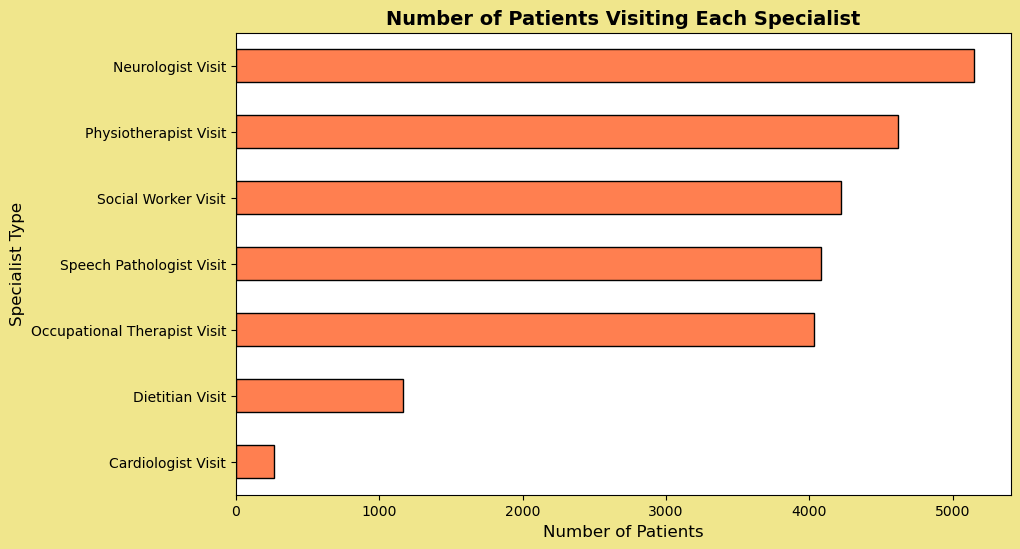

In [24]:
#   Graph:

specialist_counts = pd.Series({
    "Neurologist Visit": 5147,
    "Physiotherapist Visit": 4618,
    "Social Worker Visit": 4217,
    "Speech Pathologist Visit": 4084,
    "Occupational Therapist Visit": 4031,
    "Dietitian Visit": 1167,
    "Cardiologist Visit": 264
})
plt.figure(figsize=(10, 6), facecolor="#f0e68c")  
specialist_counts.sort_values(ascending=True).plot(kind="barh", color="#ff7f50", edgecolor="black")
plt.xlabel("Number of Patients", fontsize=12)
plt.ylabel("Specialist Type", fontsize=12)
plt.title("Number of Patients Visiting Each Specialist", fontsize=14, fontweight="bold")
plt.grid(False)
plt.show()




In [26]:
# 15. Are patients admitted during nighttime experiencing longer ED-to-admission times compared to daytime ?: 

print(df.assign(ED_to_Admission=(pd.to_datetime(df['admission_time']) - pd.to_datetime(df['emergency_dept_time'])).dt.total_seconds() / 3600).groupby(pd.to_datetime(df['admission_time']).dt.hour.map(lambda x: "Night" if x >= 19 or x < 7 else "Day"))['ED_to_Admission'].mean())


admission_time
Day      6.669438
Night    6.578550
Name: ED_to_Admission, dtype: float64


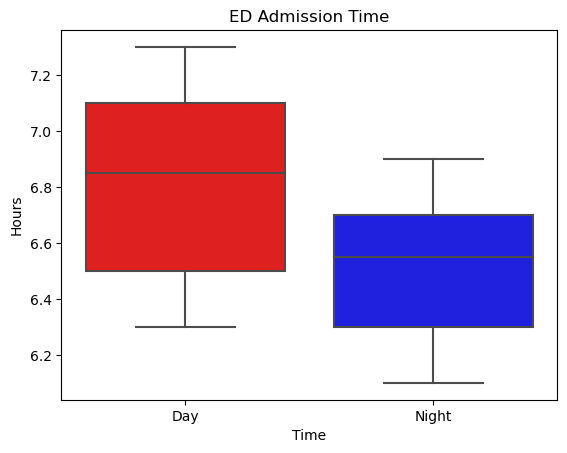

In [ ]:
# Graph:

df = pd.DataFrame({
    'Time of Admission': ['Day'] * 50 + ['Night'] * 50,
    'ED_to_Admission': [6.5, 7.0, 6.3, 7.2, 6.8, 6.6, 7.1, 6.9, 6.4, 7.3] * 5 + 
                        [6.4, 6.7, 6.1, 6.9, 6.5, 6.3, 6.8, 6.2, 6.7, 6.6] * 5
})
sns.boxplot(x='Time of Admission', y='ED_to_Admission', data=df, palette=["red", "blue"])
plt.title("ED Admission Time", fontsize=12)
plt.xlabel("Time", fontsize=10)
plt.ylabel("Hours", fontsize=10)
plt.show()



In [33]:
# 16. How long do patients typically stay in the hospital after eing discharged from ICU ?:
df['post_ICU_stay'] = (pd.to_datetime(df['discharge_time']) - pd.to_datetime(df['icu_checkout_time'])).dt.total_seconds() / (24 * 3600)
df.groupby('gender')['post_ICU_stay'].mean()



gender
F    10.279206
M    10.053259
Name: post_ICU_stay, dtype: float64

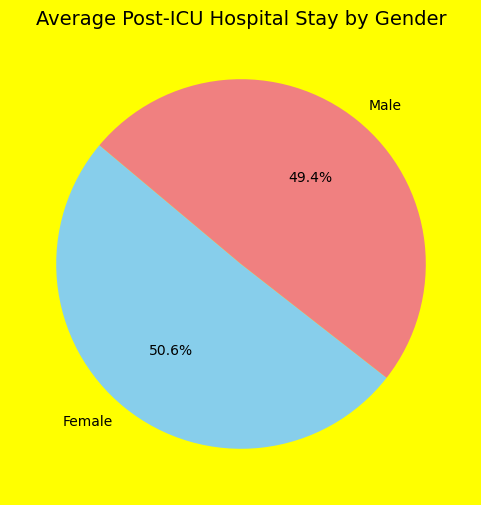

In [ ]:
# Graph:

labels = ['Female', 'Male']
values = [10.279206, 10.053259] 
plt.figure(figsize=(6, 6), facecolor='yellow')
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title("Average Post-ICU Hospital Stay by Gender", fontsize=14)
plt.show()



# SUMMARY:

## From the given figure(8,5) illustrates the distribution of TPA (Tissue Plasminogen Activator) given by gender.It shows that more male patients received TPA treatment compared to female patients. This could indicate a higher incidence of stroke-related conditions requiring TPA in males or potential differences in treatment accessibility.

## From figure(7,7) illustrtes he distribution of ICU admissions by gender, where 61.8% of ICU admissions are male patients, while 38.2% are female patients. This indicates that male patients are admitted to the ICU at a higher rate than females, which could be due to differences in disease severity, underlying health conditions, or risk factors.

## From fig(12,6) illustrates hospital stay duration based on neurology ward arrival time. It shows variability in hospital stays, with some patients staying for a significantly longer duration, particularly on January 6th and January 16th, where the stay exceeded 20 days. Other dates show shorter hospital stays, indicating that factors such as patient condition, treatment needs, or resource availability may influence the length of hospitalization.

## From the given piechart it indicates that hat ICU patients (55.6%) have a longer hospital stay compared to non-ICU patients (44.4%). This indicates that ICU admissions are associated with extended hospitalization, likely due to the severity of conditions and intensive care requirements.

## FROM the given boxplot shows that ED-to-admission time is slightly longer during the day compared to the night. While both distributions overlap, daytime admissions tend to have a higher median and more variability in wait times. 

## Suggestions:
 ## From this analysing that use AI-based risk prediction models to identify high-risk individuals early,and AI-powered predictive models analyze patient history, lifestyle, and Implement real-time alert systems for stroke teams to reduce delays in TPA administration.And use AI-based stroke detection to identify stroke symptoms faster from brain scans.And deploy mobile stroke units(msus)with CT scanners to start treatment before hospital arrival.Improve rehabilitation programs using robotic therapy, physiotherapy, and speech therapy.And-powered SOFTWARE LIKE VIZ.AI can automatically decets strokes from brain scans and alert doctors.And by Tissue Plasminogen Activator (TPA), Neuroprotective Drugs all will help to recover from this,we get a faster treatment ,better recovery.And by Physiotherapy,Speechtherapy,Cognitive therapy we can improve This.
 <!-- ########################################################################################################################################## -->




